# Resampling
### 5.3.1 The Validation Set Approach
#### Importerer Auto-data og fjerner invalid data

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

# Import Auto data
pdData = pd.read_csv("Auto.csv")
#print(pdData.to_string())

# Removed values with '?' in horsepower
pdData = pdData.drop(pdData[pdData["horsepower"] == "?"].index)
#print(pdData.to_string())

npData = np.array(pdData)
np.set_printoptions(threshold=6)#np.inf) # To see all
print(npData)

[[18.0 8 307.0 ... 70 1 'chevrolet chevelle malibu']
 [15.0 8 350.0 ... 70 1 'buick skylark 320']
 [18.0 8 318.0 ... 70 1 'plymouth satellite']
 ...
 [32.0 4 135.0 ... 82 1 'dodge rampage']
 [28.0 4 120.0 ... 82 1 'ford ranger']
 [31.0 4 119.0 ... 82 1 'chevy s-10']]


#### Opretter test-trains med sklearn

In [6]:
import sklearn.utils as sk
from sklearn.model_selection import train_test_split
np.random.seed(0) # Set seed to make same output

# picks 196 random indexes from 392 numbers
#train = sk.random.sample_without_replacement(392, 196)

np.set_printoptions(threshold=np.inf) # To see all in print
#print(train)

# choose mpg as x and horsepower as y
x = npData[:, 0].reshape((-1, 1))
y = npData[:, 3].reshape((-1, 1))
#print(x,y)

# for some reason y is strings, casts to int
for i in range(0, len(y)): 
    y[i] = int(y[i])
#print(x,y)

# split data into 2 for train- and test purpose
trainData = 50 # % of data which is for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=trainData/100) # random state set previosly
#print(x_train,y_train)
#print(x_test,y_test)

#### Makin linear regression on the training data

[-3.88746845]
[196.25712136]


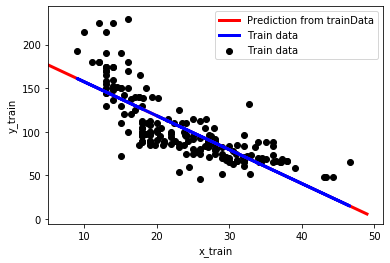

Mean squared error          (MSE): 604.65
Coefficient of determination (R2): 0.61


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# make a linear regression on the train set
model = LinearRegression()
model.fit(x_train, y_train)

print(model.coef_[0])    #haeldning
print(model.intercept_)  #skæring

# Defines a function to draw a continues line
def funcEstimateY(x):
    y_res = model.intercept_ + model.coef_[0] * x
    return y_res

# Makes a larger array for drawing the red line
xxx = np.arange(5, 50)
plt.plot(xxx, funcEstimateY(xxx), color='red', linewidth=3, label='Prediction from trainData')

# plot training data with the regression line
plt.scatter(x_train, y_train,  color='black', label='Train data')
plt.plot(x_train, funcEstimateY(x_train), color='blue', linewidth=3, label='Train data')
# Movin the axis
#plt.ylim(ymin=10)
plt.xlim(xmin=5)
plt.legend()
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.show()

# The mean squared error
print('Mean squared error          (MSE): %.2f' % mean_squared_error(y_train, funcEstimateY(x_train)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R2): %.2f' % r2_score(y_train, funcEstimateY(x_train)))

#### Testing the estimation on test-data

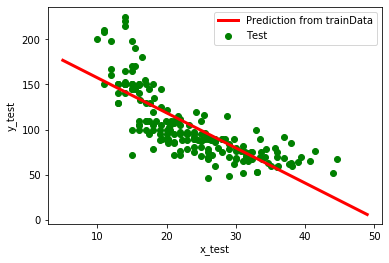

Mean squared error          (MSE): 561.12
Coefficient of determination (R2): 0.60


In [45]:
# plot test data with the regression line
#plt.scatter(x_train, y_train,  color='black', label='Train')
plt.scatter(x_test, y_test,  color='green', label='Test')

plt.plot(xxx, funcEstimateY(xxx), color='red', linewidth=3, label='Prediction from trainData')
#plt.plot(x_test, funcEstimateY(x_test), color='blue', linewidth=3, label='Prediction from trainData')
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.legend()
plt.show()

# The mean squared error
print('Mean squared error          (MSE): %.2f' % mean_squared_error(y_test, funcEstimateY(x_test)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R2): %.2f' % r2_score(y_test, funcEstimateY(x_test)))

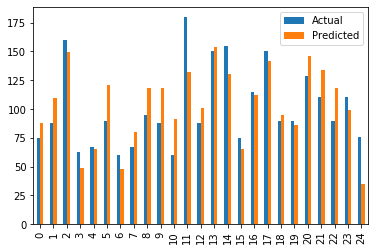

Mean squared error          (MSE): 561.12
Coefficient of determination (R2): 0.60


In [65]:
# we use our model, predicting ya values from the test-x values
y_pred = model.predict(x_test)

#making arrays from matrixes
ytest=np.squeeze(np.asarray(y_test).reshape((1, -1)))
ypred=np.squeeze(np.asarray(funcEstimateY(x_test)).reshape((1, -1)))
#print(ytest, ypred)

#converting stringlist to intlist
ytest = list(map(int, ytest))

#making a dataframe comparison between the actual and the predicted y values
pr = pd.DataFrame({'Actual': ytest, 'Predicted': ypred})
pr1 = pr.head(25)
pr1.plot.bar()
plt.show()

# The mean squared error
print('Mean squared error          (MSE): %.2f' % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R2): %.2f' % r2_score(y_test, y_pred))

### 5.3.2 Leave-One-Out Cross-Validation (LOOCV)
#### Takes MSE of every holdout-bin-combination, and takes the mean of all the MSE's

The process looks like this:


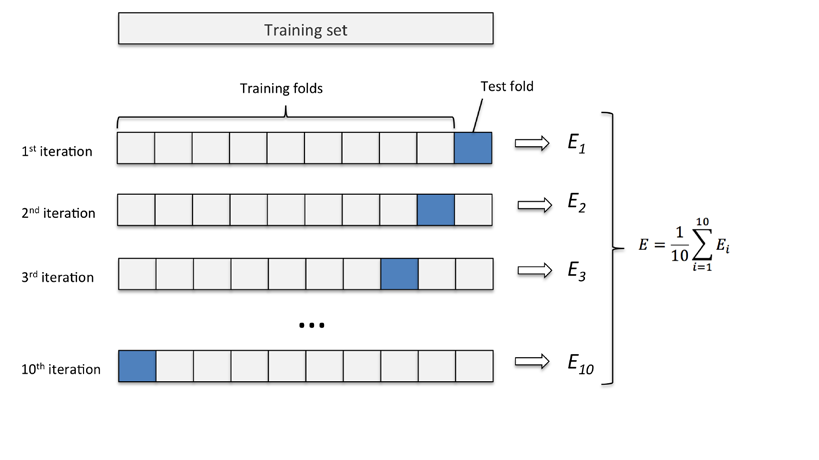

In [66]:
print('The process looks like this:')
from IPython.display import Image
Image(filename="test.png",width=400,height=300)
Image(filename="test.png",width=400,height=300)

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

mse = make_scorer(mean_squared_error)

# LOOCV is equal to k-folds-CV, when k=size of x
k = x_test.shape[0]
cv_results = cross_val_score(model, x_test, y_test, scoring=mse, cv=k)

print('All bins(n=%d) gives a mean cv-MSE of: %.2f' % (k, cv_results.mean()))

All bins(n=196) gives a mean cv-MSE of: 572.90


### 5.3.3 LOOCV with K-folds
#### Makes LOOCV but the bins are small'er

In [70]:
k = 19
cv_results = cross_val_score(model, x_test, y_test, scoring=mse, cv=k)
print('k-bins(k=%d) gives a mean cv-MSE of: %.2f' % (k, cv_results.mean()))
print('NOTE - k=19 gives a better mean-MSE than k=20 properly due to rounding errors??')

k-bins(k=19) gives a mean cv-MSE of: 571.56
NOTE - k=19 gives a better mean-MSE than k=20 properly due to rounding errors??
